<a href="https://colab.research.google.com/github/ak-ghoul/Deep-Learning/blob/master/GD_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.2.1)


In [0]:
pip install bigfloat

     |████████████████████████████████| 225kB 4.8MB/s 
  ERROR: Failed building wheel for bigfloat
  Running setup.py clean for bigfloat
Failed to build bigfloat
  Running setup.py install for bigfloat ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-6mf9444f/bigfloat/setup.py'"'"'; __file__='"'"'/tmp/pip-install-6mf9444f/bigfloat/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-sm9ub7g9/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
import matplotlib.colors

from matplotlib import animation, rc
from IPython.display import HTML

import numpy as np
import seaborn as sb
from math import exp

In [0]:
class SN:
  
  def __init__(self, w_init, b_init, algo):
    self.w = w_init
    self.b = b_init
    self.algo = algo 
    self.w_h = []
    self.b_h = []
    self.e_h = []
    
  def sigmoid(self, x, w = None, b = None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    try:
      ans = np.exp(-(w*x + b))
    except OverflowError:
      ans = float('inf')  
    return 1.0/(1.0 + ans)
  
  def error(self, X, Y, w = None, b = None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
      
    err = 0  
    for x,y in zip(X, Y):
      err += 0.5 * (self.sigmoid(x, w, b) - y)**2
      
    return err
  
  def grad_w(self, x, y, w = None, b = None):
    if w is None:
      w = self.w
    if b is None:
      b= self.b
      
    y_pred = self.sigmoid(x,w,b)
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y, w = None, b = None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    y_pred = self.sigmoid(x,w,b)
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs = 200, lr = 0.1, gamma = 0.9, mini_batch_size = 100, eps = 1e-8, beta = 0.9, beta1 = 0.9, beta2 = 0.9):
    self.X = X
    self.Y = Y
    self.w_h = []
    self.b_h = []
    self.e_h = []
    
    if self.algo == 'GD':
      for i in range(epochs):
        dw, db = 0, 0
        for x,y in zip(X,Y):
          dw += self.grad_w(x,y)
          db += self.grad_b(x,y)
        m = X.shape[0]
        self.w -= lr * dw/m
        self.b -= lr * db/m
        self.append_log()
        
    elif self.algo == 'Momentum':
      v_w, v_b = 0, 0
      for i in range(epochs):
        dw = 0
        db = 0
        for x,y in zip(X,Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
        v_w = gamma * v_w + lr * dw   # more closer gamma is to 1 more  
        v_b = gamma * v_b + lr * db
        self.w -= v_w
        self.b -= v_b
        self.append_log()
        
    elif self.algo == 'NAG':
      v_w, v_b = 0, 0
      for i in range(epochs):
        dw = 0
        db = 0
        v_w *= gamma    #half part of history component
        v_b *= gamma
        for x,y in zip(X,Y):
          dw += self.grad_w(x, y, self.w - v_w, self.b - v_b)
          db += self.grad_b(x, y, self.w - v_w, self.b - v_b)
        v_w += lr * dw       # other half of history component which is change on basis of gradient
        v_b += lr * db
        self.w -= v_w   # the change is only on basis of gradient here as second part of history component is just change on basis of gradient.
        self.b -= v_b
        self.append_log()
        
    elif self.algo == 'Mini-Batch':
      for i in range(epochs):
        dw, db = 0, 0
        points_seen = 0
        for x,y in zip(X,Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
          points_seen += 1
          if points_seen % mini_batch_size == 0:
            self.w -= lr * dw/mini_batch_size   # the number of rows in this small batch of dataset r equal to batch size & not total no of rows in dataset
            self.b -= lr * db/mini_batch_size
            self.append_log()
            dw, db = 0, 0
            
    elif self.algo == 'Adagrad':
      v_w, v_b = 0, 0
      for i in range(epochs):
        dw, db = 0, 0
        for x,y in zip(X,Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
        v_w += dw ** 2
        v_b += db ** 2
        self.w -= (lr/(np.sqrt(v_w) + eps)) * dw
        self.b -= (lr/(np.sqrt(v_b) + eps)) * db
        self.append_log()
        
    elif self.algo == 'RMSProp':
      v_w, v_b = 0, 0
      for i in range(epochs):
        dw, db =0, 0
        for x,y in zip(X,Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
        v_w = v_w * beta + (1 - beta) * dw**2
        v_b = v_b * beta + (1 - beta) * db**2
        self.w -= (lr/(np.sqrt(v_w) + eps)) * dw
        self.b -= (lr/(np.sqrt(v_b) + eps)) * db
        self.append_log()
        
    elif self.algo == 'Adam':
      v_w, v_b =0, 0
      m_w, m_b =0, 0
      num_updates = 0 
      for i in range(epochs):
        dw, db =0, 0
        for x,y in zip(X,Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
          num_updates += 1
          m_w = v_w + (1 - beta1) * dw
          m_b = v_b + (1 - beta1) * db
          v_w = beta2 * v_w + (1 - beta2) * dw**2
          v_b = v_b * beta2 + (1 - beta2) * db**2
          m_w_c = m_w/(1 - np.power(beta1, num_updates))
          m_b_c = m_b/(1 - np.power(beta1, num_updates))
          v_w_c = v_w/(1 - np.power(beta2, num_updates))
          v_b_c = v_b/(1 - np.power(beta2, num_updates))
          self.w -= (lr/(np.sqrt(v_w_c) + eps)) * m_w_c
          self.b -= (lr/(np.sqrt(v_b_c) + eps)) * m_b_c
          self.append_log()
        
  def append_log(self):
    self.w_h.append(self.w)
    self.b_h.append(self.b)
    self.e_h.append(self.error(self.X, self.Y))
    

In [0]:
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])


In [0]:
sb.set()

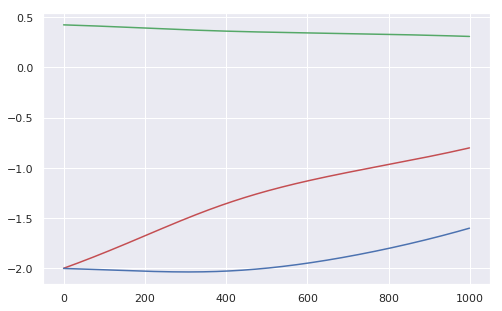

In [0]:
sn = SN(-2, -2, 'GD')
sn.fit(X, Y, epochs = 1000, lr = .1)
plt.figure(figsize = (8,5))
plt.plot(sn.w_h, 'r')
plt.plot(sn.b_h, 'b')
plt.plot(sn.e_h, 'g')
plt.show()

In [0]:
def plot_animate_3d(i):
  i = int(i*(epochs/animation_frames))
  line1.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
  line1.set_3d_properties(sn.e_h[:i+1])
  line2.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
  line2.set_3d_properties(np.zeros(i+1) - 1)
  title.set_text('Epoch: {: d}, Error: {:.4f}'.format(i, sn.e_h[i]))
  return line1, line2, title 

In [0]:
plot_3d = True
plot_2d = False
w_min = -7   #values chosen on basis of some deterministic approach
w_max = 5

b_min = -7
b_max = 5

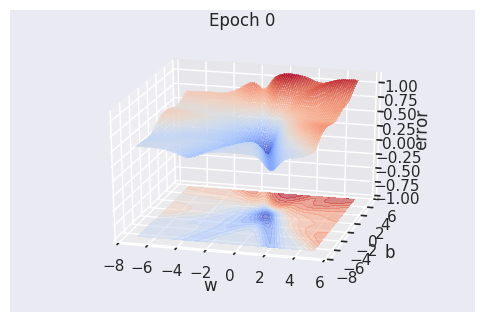

<Figure size 1080x432 with 0 Axes>

In [0]:
if plot_3d: 
  W = np.linspace(w_min, w_max, 256)
  b = np.linspace(b_min, b_max, 256)
  WW, BB = np.meshgrid(W, b)
  Z = sn.error(X, Y, WW, BB)

  fig = plt.figure(dpi=100)
  plt.figure(figsize = (15,6))
  ax = fig.gca(projection='3d')
  surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
  cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
  ax.set_xlabel('w')
  ax.set_xlim(w_min - 1, w_max + 1)
  ax.set_ylabel('b')
  ax.set_ylim(b_min - 1, b_max + 1)
  ax.set_zlabel('error')
  ax.set_zlim(-1, np.max(Z))
  ax.view_init (elev=25, azim=-75) # azim = -20
  ax.dist=12  
  title = ax.set_title('Epoch 0')

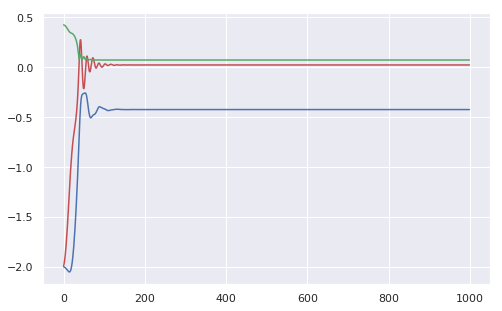

In [0]:
 snm = SN(-2, -2, 'Momentum')
snm.fit(X, Y, epochs = 1000, lr = .1)
plt.figure(figsize = (8,5))
plt.plot(snm.w_h, 'r')
plt.plot(snm.b_h, 'b')
plt.plot(snm.e_h, 'g')
plt.show()

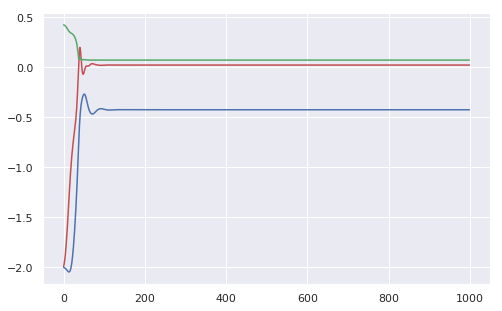

In [0]:
sng = SN(-2, -2, 'NAG')
sng.fit(X, Y, epochs = 1000, lr = .1)
plt.figure(figsize = (8,5))
plt.plot(sng.w_h, 'r')
plt.plot(sng.b_h, 'b')
plt.plot(sng.e_h, 'g')
plt.show()

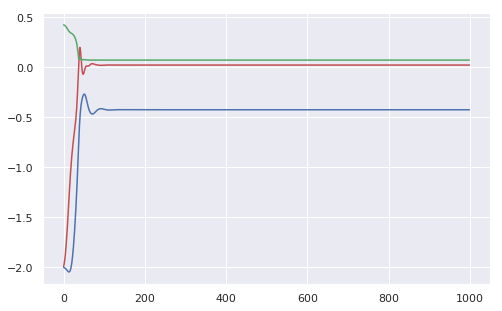

In [0]:
snmb = SN(-2, -2, 'Mini-Batch')
snmb.fit(X, Y, epochs = 100, lr = 2, mini_batch_size = 1)
plt.figure(figsize = (8, 5))
plt.plot(sng.w_h, 'r')
plt.plot(sng.b_h, 'b')
plt.plot(sng.e_h, 'g')
plt.show()

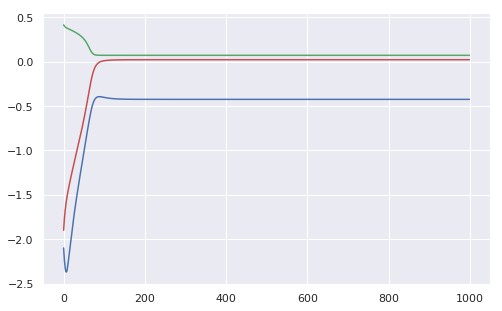

In [0]:
sadg = SN(-2, -2, 'Adagrad')   # adagrad focuses on changing learning rates based on no of times appearence of a particular data point
sadg.fit(X, Y, epochs = 1000, lr = 0.1)
plt.figure(figsize = (8,5))
plt.plot(sadg.w_h, 'r')
plt.plot(sadg.b_h, 'b')
plt.plot(sadg.e_h, 'g')
plt.show()

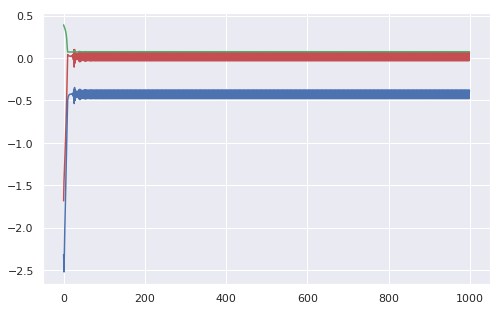

In [0]:
srms = SN(-2, -2, 'RMSProp')
srms.fit(X, Y, epochs = 1000, lr = 0.1)
plt.figure(figsize = (8,5))
plt.plot(srms.w_h, 'r')
plt.plot(srms.b_h, 'b')
plt.plot(srms.e_h, 'g')
plt.show()

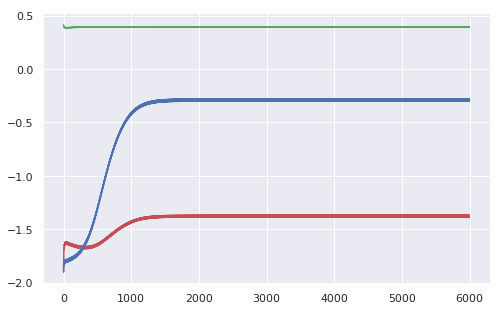

In [0]:
sadm = SN(-2, -2, 'Adam')
sadm.fit(X, Y, epochs = 1000, lr = 0.1)
plt.figure(figsize = (8,5))
plt.plot(sadm.w_h, 'r')
plt.plot(sadm.b_h, 'b')
plt.plot(sadm.e_h, 'g')
plt.show()